In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import correlate, correlation_lags
from LAB_UW_functions import *
from LAB_UW_forward_modeling import *
from scipy.signal import find_peaks
import glob


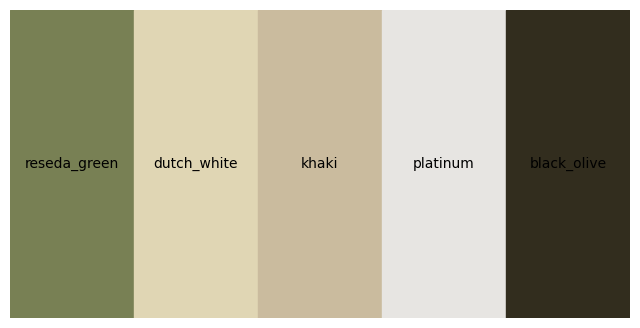

In [2]:
import matplotlib.patches as patches
import matplotlib.colors as mcolors

# Define the color data in Extended Array format
colors = {
    'reseda_green': '#788054',
    'dutch_white': '#E0D6B4',
    'khaki': '#CABB9E',
    'platinum': '#E7E5E2',
    'black_olive': '#322D1E'
}

# Plot a sample using the colors
fig, ax = plt.subplots(figsize=(8, 4))
for i, (color_name, hex_code) in enumerate(colors.items()):
    rgba = mcolors.hex2color(hex_code)  # Convert hexadecimal color to RGBA
    rect = patches.Rectangle((i, 0), 1, 1, color=rgba)
    ax.add_patch(rect)
    ax.text(i + 0.5, 0.5, color_name, color='black', ha='center', va='center')

ax.set_xlim(0, len(colors))
ax.set_ylim(0, 1)
ax.axis('off')
plt.show()


In [3]:

def find_mechanical_data(file_path_list, pattern):
    """
    Trova un file specifico all'interno di una lista di percorsi dei file utilizzando un pattern.
    
    Args:
        file_path_list (list): Lista di percorsi dei file in cui cercare il file.
        pattern (str): Pattern per il nome del file da cercare.
    
    Returns:
        str: Percorso completo del file trovato, o None se non viene trovato nessun file corrispondente.
    """
    for file_path in file_path_list:
        if glob.fnmatch.fnmatch(file_path, pattern):
            print("MECHANICAL DATA CHOOSE:", file_path)
            return file_path
    return None  # Nessun file trovato nella lista
    

def find_sync_values(mech_data_path):
    """
    Trova i valori di picco sincronizzazione all'interno di un file di dati meccanici.

    Questa funzione legge un file CSV contenente dati meccanici, estrae la colonna
    relativa alla sincronizzazione e individua i picchi di sincronizzazione in base
    ai parametri specificati.

    Args:
        mech_data_path (str): Percorso del file CSV contenente i dati meccanici.

    Returns:
        numpy.ndarray: Un array NumPy contenente gli indici dei picchi di sincronizzazione
                       trovati nei dati meccanici.
    """
    mech_data = pd.read_csv(mech_data_path, sep=',', skiprows=[1])
    sync_data = mech_data.sync
    
    # Trova i picchi di sincronizzazione nei dati sincronizzazione
    sync_peaks, _ = find_peaks(sync_data, prominence=4.2, height=4)
    print(sync_peaks)
    return mech_data, sync_data, sync_peaks

def plot_sync_peaks(sync_data, sync_peaks, experiment_name):
    """
    Visualizza i picchi di sincronizzazione su un grafico dei dati di sincronizzazione.

    Questa funzione prende i dati di sincronizzazione e gli indici dei picchi di sincronizzazione,
    quindi crea un grafico per visualizzare sia i dati di sincronizzazione che i picchi di sincronizzazione
    evidenziati in rosso.

    Args:
        sync_data (numpy.ndarray): Array NumPy contenente i dati di sincronizzazione.
        sync_peaks (numpy.ndarray): Array NumPy contenente gli indici dei picchi di sincronizzazione.
        experiment_name (str): Nome dell'esperimento o della prova da visualizzare nel titolo del grafico.
    """
    
    plt.figure(figsize=(10, 4))
    plt.title(f'Sync Peaks {experiment_name}')
    

    # Plot dei picchi di sincronizzazione evidenziati in rosso
    plt.scatter(np.arange(0, len(sync_data))[sync_peaks], sync_data[sync_peaks], c='r', s = 10, zorder = 2, alpha = 0.8)
    
    # Plot dei dati di sincronizzazione
    plt.plot(sync_data, zorder = 1, c = 'k', linewidth = 0.8)
    
    plt.ylabel('Arduino voltage [V]', fontsize=12)
    plt.xlabel('records #', fontsize=12)
    
    plt.show()
    




def cross_correlation(signal1, signal2):
    """
    Compute the cross-correlation between two signals.

    Parameters:
        signal1 (array_like): The first signal.
        signal2 (array_like): The second signal.

    Returns:
        ndarray: The cross-correlation result.
    """
    return np.correlate(signal1, signal2, mode='full')

def find_time_delay(signal1, signal2, sampling_rate):
    """
    Find the time delay between two signals using cross-correlation.

    Parameters:
        signal1 (array_like): The first signal.
        signal2 (array_like): The second signal.
        sampling_rate (float): The sampling rate of the signals.

    Returns:
        float: The time delay between the two signals.
    """
    # Compute cross-correlation
    cross_corr_result = cross_correlation(signal1, signal2)

    # Calculate the time delay (index of maximum value)
    max_index = np.argmax(cross_corr_result)

    # Convert index to time delay (in mu seconds)
    time_delay = max_index / sampling_rate

    return time_delay


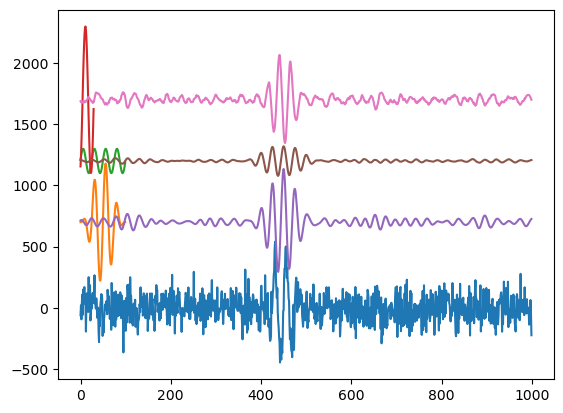

In [4]:
# Example usage of Correlation to look for a pulse in a waveform.
# Generate a synthetic signal and check the right sta_window and lta_window to maximize the ratio

nsamples = 1000
time = np.linspace(0, 10, nsamples)

noise_amplitude = 1
noise = np.random.normal(0, noise_amplitude, nsamples)

signal = np.zeros(noise.shape)

winlen = 100
square_start = 400
amp_square = 5
mask = amp_square * np.hanning(winlen)
signal[square_start:square_start+winlen] = mask

frequency = 4  # Hz
amplitude = 1
sin_signal = np.sin(2 * np.pi * frequency * time[square_start:square_start+winlen])
signal[square_start:square_start+winlen] =  mask * sin_signal

waveform = signal + noise


a = signal[square_start:square_start+winlen]
b = waveform
c = sin_signal
d = sin_signal = 6* np.sin(2 * np.pi * frequency * time[square_start+70:square_start+winlen])
plt.plot(100*b)
plt.plot(100*a+700)
plt.plot(100*c+1200)
plt.plot(100*d+1700)

plt.plot(np.convolve(-a,b,mode="same")+700)
plt.plot(np.convolve(-c,b,mode="same")+1200)
plt.plot(np.convolve(-d,b,mode="same")+1700)


In [5]:
### INPUT DATA ###
# These are constants through the entire experiment.
side_block_1 = 2               # [cm] width of first side block
side_block_2 = 2               # [cm] width of first gouge layer
central_block = 4.8
grooves = 0.1                   # [cm] high of the grooves
x_trasmitter = 1                              # [cm] position of the trasmitter from the beginning of the sample: the distance from the beginning of the block is fixed. Same for the receiver


In [6]:
# Calibration
# From the experiment without gouge, only the two side block one against the other, find the correct velocity of steel
# Load Waveform data
machine_name = "Brava_2"
experiment_name = "s0098"
data_type_uw = 'data_tsv_files'

#MAKE UW PATH LIST
infile_path_list_uw = sorted(make_infile_path_list(machine_name,experiment_name, data_type=data_type_uw))
choosen_uw_file = 2                # which of the sorted UW files analized. It must correspond to the part of mechanical data extracted!
infile_path = infile_path_list_uw[choosen_uw_file]      
print('PROCESSING UW DATA IN %s: ' %infile_path)
# LOAD UW DATA
data_OBS,metadata = make_UW_data(infile_path)
t_OBS = metadata['time_ax_waveform']

PROCESSING UW DATA IN /home/michele/Desktop/Dottorato/active_source_implementation/experiments_Brava_2/s0098/data_tsv_files/PIS1_PIS2_ramp015_steel_4.bscan.tsv: 


0.3374233128834356


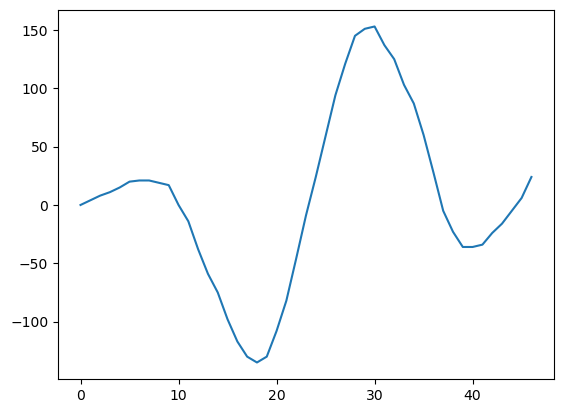

In [7]:
# Calcuate velocity from travel time picked, given know distance.
pick_start = 163
pick_end = 210
plt.plot(data_OBS[100,pick_start:pick_end])
time_calibration = t_OBS[pick_start]
csteel = (side_block_1 - 2*x_trasmitter + side_block_2 + 2*grooves)/ time_calibration
print(csteel)

In [8]:
# GET OBSERVED DATA

# Load Waveform data
machine_name = "Brava_2"
experiment_name = "s0108"
data_type_uw = 'data_tsv_files'
data_type_mech = 'mechanical_data'
sync_file_pattern = '*s*_data_rp' #pattern to find specific experiment in mechanical data

#MAKE UW PATH LIST
infile_path_list_uw = sorted(make_infile_path_list(machine_name,experiment_name, data_type=data_type_uw))
choosen_uw_file = 0                # which of the sorted UW files analized. It must correspond to the part of mechanical data extracted!
infile_path = infile_path_list_uw[choosen_uw_file]      
print('PROCESSING UW DATA IN %s: ' %infile_path)
# LOAD UW DATA
data_OBS,metadata = make_UW_data(infile_path)
t_OBS = metadata['time_ax_waveform']

# REMOVEVE EVERYTHING BEFORE initial_time_removed: given the velocity in plays, there can be only noise there.
initial_time_removed = 0         # [mus]

t_OBS,data_OBS = t_OBS[t_OBS>initial_time_removed], data_OBS[:,t_OBS>initial_time_removed]


#MAKE MECHANICAL PATH LIST
infile_path_list_mech = make_infile_path_list(machine_name, experiment_name, data_type=data_type_mech)
#LOAD MECHANICAL DATA
mech_data_path= find_mechanical_data(infile_path_list_mech, sync_file_pattern)
mech_data, _ , sync_peaks = find_sync_values(mech_data_path)
# plot_sync_peaks(sync_data, sync_peaks, experiment_name)


PROCESSING UW DATA IN /home/michele/Desktop/Dottorato/active_source_implementation/experiments_Brava_2/s0108/data_tsv_files/001_run_in_10MPa.bscan.tsv: 
MECHANICAL DATA CHOOSE: /home/michele/Desktop/Dottorato/active_source_implementation/experiments_Brava_2/s0108/mechanical_data/s0108sw06car102030_data_rp
[  5582   8698  14897  20041  21539  25547  28955  65521  80497 116274
 126306 128395 133717 135661 162041 198593 213558 249224 259432 261425
 266238 270468 273597 309133 324191 359786 369610 374824]


In [9]:
mech_data

,Unnamed: 0,shear_stress_MPa,lp_disp_mm,ec_disp_mm,normal_stress_MPa,lt_ec_mm1,rgt_lt_mm,friction_na,sync,time_s,records_na
0,1,-0.000000,0.000000,0.000000,1.000000e-07,5.999966,6.000000,-0.000000,0.004660,1.0,1.0
1,2,-0.000000,0.000000,0.000000,1.000000e-07,5.999956,5.999966,-0.000000,0.004660,2.0,2.0
2,3,-0.000000,0.000000,0.000000,1.000000e-07,5.999902,5.999956,-0.000000,0.004663,3.0,3.0
3,4,-0.000000,0.000000,0.000000,1.000000e-07,5.999929,5.999902,-0.000000,0.004667,4.0,4.0
4,5,-0.000000,0.000000,0.000000,1.000000e-07,5.999946,5.999929,-0.000000,0.004666,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
375018,375019,-0.972079,22.586414,20.581775,-4.370488e+00,4.803972,5.533018,0.222419,-0.005481,15892.0,375019.0
375019,375020,-0.971216,22.586631,20.581992,-4.432264e+00,4.803950,5.533012,0.219124,-0.005471,15893.0,375020.0
375020,375021,-0.968623,22.585993,20.581354,-4.458021e+00,4.804039,5.532959,0.217277,-0.005471,15894.0,375021.0
375021,375022,-0.970863,22.586752,20.582112,-4.424018e+00,4.803967,5.533084,0.219453,-0.005474,15895.0,375022.0


In [10]:
# EXTRACT LAYER THICKNESS FROM MECHANICA DATA
#Choose layer thickness from mechanical data using sync peaks indexes
thickness_gouge_1_list = mech_data.rgt_lt_mm[sync_peaks[2*choosen_uw_file]: sync_peaks[2*choosen_uw_file+1]].values/10  #the velocities are in cm/mus, layer thickness in mm. Divided by ten!!!
thickness_gouge_2_list = thickness_gouge_1_list
data_OBS = data_OBS[:len(thickness_gouge_1_list)]
metadata['time_ax_acquisition'] = metadata['time_ax_acquisition'][:len(data_OBS)]

### Crosscorrelation on DDS data: follow Bryan M. Kaproth1 and Chris Marone 2014
#### Find a master waveform from the data 

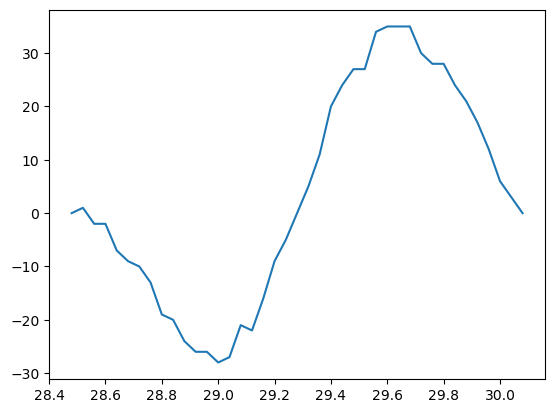

In [11]:
'''
Cross correlation compares a master waveform to other seismograms, 
identifying a flight time shift. After selecting master waves with high signalto-noise ratios...
'''
idx_wave_high_signal = 100
waveform_high_signal = data_OBS[idx_wave_high_signal]
pulse_start = 711
pulse_end = 752
pulse = waveform_high_signal[pulse_start:pulse_end]    
t_pulse = t_OBS[pulse_start:pulse_end]
len_pulse = t_pulse[-1]-t_pulse[0]
plt.figure()
plt.plot(t_pulse,pulse)

# TRY ANOTHER PULSE...
# '''
# Cross correlation compares a master waveform to other seismograms, 
# identifying a flight time shift. After selecting master waves with high signalto-noise ratios...
# '''
# idx_wave_high_signal = 300
# waveform_high_signal = data_OBS[idx_wave_high_signal]
# pulse_start = 708
# pulse_end = 740
# pulse = waveform_high_signal[pulse_start:pulse_end]    
# t_pulse = t_OBS[pulse_start:pulse_end]
# plt.figure()
# plt.plot(t_pulse,pulse)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


/home/michele/Desktop/Dottorato/active_source_implementation/experiments_Brava_2/s0108/data_analysis/poster_EGU_2024/cross_correlation_pulse_selection.eps


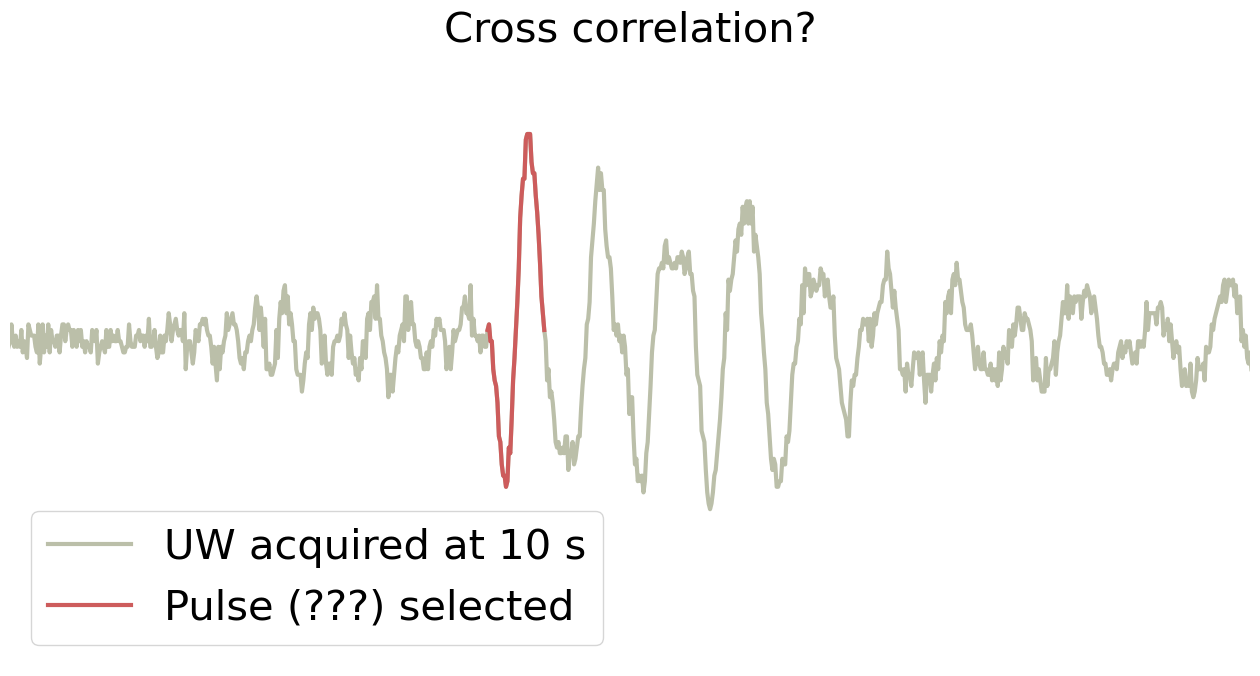

In [12]:
# CHOOSE OUTFILE_PATH
outdir_path = make_data_analysis_folders(machine_name=machine_name, experiment_name=experiment_name,data_types=["poster_EGU_2024"])

outfile_name = "cross_correlation_pulse_selection.eps"
outfile_path = os.path.join(outdir_path[0], outfile_name)
print(outfile_path)

font_size = 30
# Pulse selected for cross correlation
fig = plt.figure(figsize=[16, 8])
t_acqu = int(metadata['time_ax_acquisition'][idx_wave_high_signal])

plt.plot(t_OBS, waveform_high_signal, color=colors['reseda_green'], alpha=0.5, label=f"UW acquired at {t_acqu} s",linewidth=3.0 )

plt.plot(t_pulse,pulse, label="Pulse (???) selected", color="indianred", linewidth=3.0 )
plt.xlim([15, 50])
plt.legend()
plt.ylim([-60,50])
plt.title('Cross correlation?', fontsize=font_size)
plt.axis('off')  # Turn off the axis
plt.legend(loc="lower left", fontsize=font_size)
plt.xlabel("Time [$\mu$s]", fontsize=font_size)
plt.savefig(outfile_path)
# plt.ylabel("Amplitude [a.u.]")


In [13]:
plt.rcParams['agg.path.chunksize'] = 110000  # Or adjust the value as needed

# Cross-correlate over the entire file
first_arrival_list = np.zeros(len(data_OBS))
sampling_frequency = 1/metadata['sampling_rate']

downsampling = 1
for idx,waveform in enumerate(data_OBS[::downsampling]):
    # Specify sampling rate

    # Find time delay
    time_delay = find_time_delay(waveform, pulse, sampling_frequency)
    # print(f"Time delay between signal1 and signal2: {time_delay} mu seconds")
    first_arrival_list[idx] = time_delay

    # # PLOT
    # font_size = 30
    # # Pulse selected for cross correlation
    # fig = plt.figure(figsize=[16, 8])
    # t_acqu = int(metadata['time_ax_acquisition'][idx*downsampling])
    # idx_cross = np.where((t_OBS>time_delay - len_pulse) & (t_OBS<time_delay))

    # plt.plot(t_OBS, waveform, color=colors['reseda_green'], alpha=0.5, label=f"UW acquired at {t_acqu} s",linewidth=3.0 )

    # plt.plot(t_OBS[idx_cross], waveform[idx_cross], label="False Pick", color="indianred", linewidth=3.0 )
    # plt.xlim([15, 50])
    # # plt.legend()
    # plt.ylim([-60,50])
    # plt.title('Cross correlation?', fontsize=font_size)
    # plt.axis('off')  # Turn off the axis
    # plt.legend(loc="lower left", fontsize=font_size)
    # plt.xlabel("Time [$\mu$s]", fontsize=font_size)

    # ooutfile_name = f"cross_correlation_wrong_pick{idx}.eps"
    # outfile_path = os.path.join(outdir_path[0], ooutfile_name)
    # print(outfile_path)
    # plt.savefig(outfile_path)
    # plt.show()

    # plt.ylabel("Amplitude [a.u.]")

Text(0.5, 1.0, 'Time arrival using cross-correlation')

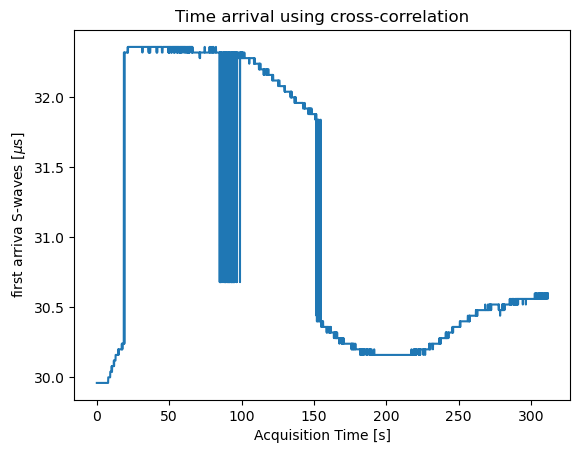

In [14]:
# Plot the first arrival picked by the cross-correlation
plt.plot(metadata['time_ax_acquisition'], first_arrival_list)
plt.ylabel(f'first arriva S-waves [$\mu$s]')
plt.xlabel('Acquisition Time [s]')
plt.title('Time arrival using cross-correlation')

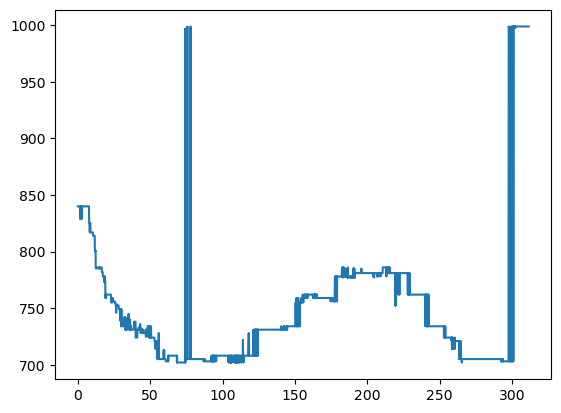

In [15]:
# Search Space for global optimization of the velocities
cmin = 600        
cmax = 1800 
c_step = 1
c_gouge_list = np.arange(cmin, cmax,c_step) 

dir_path = "/home/michele/Desktop/Dottorato/active_source_implementation/experiments_Brava_2/s0108/data_analysis/global_optimization_velocity/workstation_ones"
font_size = 30

choosen_uw_file = 0
file_name = sorted(os.listdir(dir_path))[choosen_uw_file]
file_path = os.path.join(dir_path,file_name)
l2_norm = np.load(file_path) 
l2_norm = l2_norm[:,:len(c_gouge_list)]

# look for the minimum around cross_corr values
cross_corr_min = 600     # [m/s]  velocity from cross-correlation  
cross_corr_max = 1200     # [m/s]  velocity from cross-correlation  
idx_c_gouge_list_plot =  np.where((c_gouge_list>700) & (c_gouge_list<1000))
c_gouge_list_plot = c_gouge_list[idx_c_gouge_list_plot]
l2_norm_plot = l2_norm[:,idx_c_gouge_list_plot]

right_v = c_gouge_list_plot[np.argmin(l2_norm_plot, axis=2)]
plt.figure()
plt.plot(metadata['time_ax_acquisition'],right_v) 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


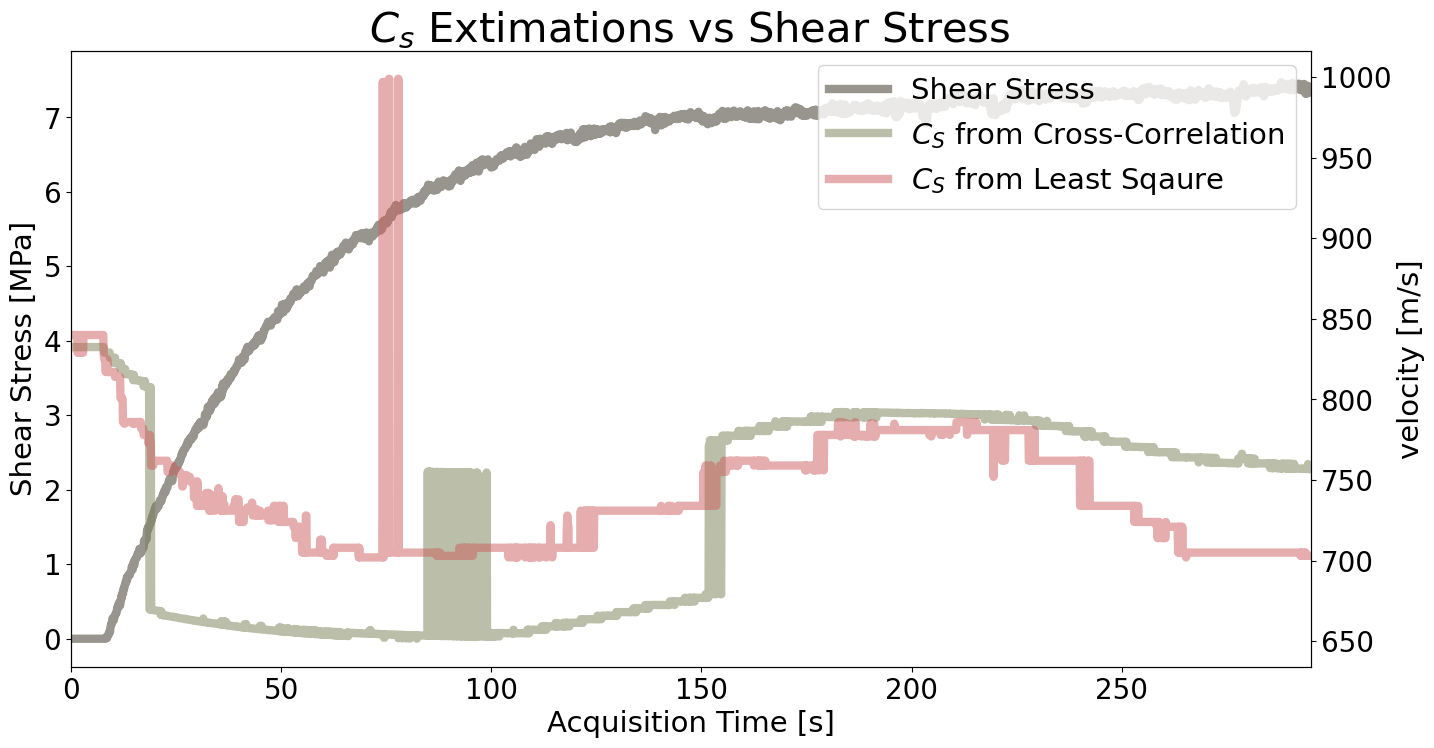

In [23]:
# SHEAR WAVE VELOCITY FROM CROSS CORRELATION AND FROM SIMULATION
c_from_crosscorr = 2*thickness_gouge_1_list/(first_arrival_list - 2*(side_block_1-x_trasmitter)/csteel -central_block/csteel)
sheear_stress = mech_data.shear_stress_MPa[sync_peaks[2*choosen_uw_file]: sync_peaks[2*choosen_uw_file+1]].values  #the velocities are in cm/mus, layer thickness in mm. Divided by ten!!!

fig, ax1 = plt.subplots(figsize=(16, 8)) 

# ax1.set_facecolor('aliceblue')

ax1.plot(metadata['time_ax_acquisition'],sheear_stress,  color=colors['black_olive'], alpha=0.5,linewidth=6.0, label= "Shear Stress")
ax1.set_xlim(0,295)
ax1.set_xlabel('Acquisition Time [s]',fontsize=0.7*font_size)
ax1.set_ylabel('Shear Stress [MPa]',fontsize=0.7*font_size)
ax1.set_title('$C_s$ Extimations vs Shear Stress ',fontsize=font_size)

ax2 = ax1.twinx()
ax2.plot(metadata['time_ax_acquisition'],1e4*c_from_crosscorr,  color=colors['reseda_green'], alpha=0.5,linewidth=6.0, label= "$C_S$ from Cross-Correlation")
ax2.plot(metadata['time_ax_acquisition'],right_v, color='indianred', alpha=0.5,linewidth=6.0, label= "$C_S$ from Least Sqaure") 
ax2.set_ylabel('velocity [m/s]',fontsize=0.7*font_size)

ax1.tick_params(axis='both', which="both", labelsize=20)
ax2.tick_params(axis='both', which="both", labelsize=20)

# Get handles and labels from both axes
handles1, labels1 = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()

# Concatenate handles and labels
handles = handles1 + handles2
labels = labels1 + labels2

# Create legend for the entire figure
plt.legend(handles, labels, loc='upper right',fontsize=0.7*font_size)

outfile_path_l2norm_EGU = f"/home/michele/Desktop/Conferenza EGU 2024/run_in_velocity_.eps"
plt.savefig(outfile_path_l2norm_EGU)


In [17]:
mech_data

,Unnamed: 0,shear_stress_MPa,lp_disp_mm,ec_disp_mm,normal_stress_MPa,lt_ec_mm1,rgt_lt_mm,friction_na,sync,time_s,records_na
0,1,-0.000000,0.000000,0.000000,1.000000e-07,5.999966,6.000000,-0.000000,0.004660,1.0,1.0
1,2,-0.000000,0.000000,0.000000,1.000000e-07,5.999956,5.999966,-0.000000,0.004660,2.0,2.0
2,3,-0.000000,0.000000,0.000000,1.000000e-07,5.999902,5.999956,-0.000000,0.004663,3.0,3.0
3,4,-0.000000,0.000000,0.000000,1.000000e-07,5.999929,5.999902,-0.000000,0.004667,4.0,4.0
4,5,-0.000000,0.000000,0.000000,1.000000e-07,5.999946,5.999929,-0.000000,0.004666,5.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...
375018,375019,-0.972079,22.586414,20.581775,-4.370488e+00,4.803972,5.533018,0.222419,-0.005481,15892.0,375019.0
375019,375020,-0.971216,22.586631,20.581992,-4.432264e+00,4.803950,5.533012,0.219124,-0.005471,15893.0,375020.0
375020,375021,-0.968623,22.585993,20.581354,-4.458021e+00,4.804039,5.532959,0.217277,-0.005471,15894.0,375021.0
375021,375022,-0.970863,22.586752,20.582112,-4.424018e+00,4.803967,5.533084,0.219453,-0.005474,15895.0,375022.0
